In [6]:
# Imports
import gzip # as some instance files may have been compressed

# Re-import dependencies (in case earlier import was skipped)
import numpy    as np
from math       import ceil, log2
from matplotlib import pyplot as plt


from configs        import EA_Config, Exp_Config
from run_experiment import run_experiments, round_to_multiple

In [7]:
pop_sizes = list(2**x for x in range(1, 13))

setups = {
    f"pop_size 2**{int(log2(x))}" : EA_Config(pop_size=x) for x in pop_sizes
}

# setups = {
#     "Identical Decoder"             : IdenticalDecoder(problem),
#     "Inverse Permutation Decoder"   : InvPermDecoder(problem),
#     "Random Keys Decoder"           : RandomKeysDecoder(problem)
# }

exp_cfg = Exp_Config("pop_size", n_experiments=10)

In [8]:
all_fitnesses_overtime, all_iterations, all_total_times, all_iter_times = run_experiments(setups, exp_cfg)

pop_size 2**1
                                                                                                    
pop_size 2**2
                                                                                                    
pop_size 2**3
                                                                                                    
pop_size 2**4
                                                                                                    
pop_size 2**5
                                                                                                    
pop_size 2**6
                                                                                                    
pop_size 2**7
                                                                                                    
pop_size 2**8
                                                                                                    
pop_size 2**9
                                                                  

In [7]:
colors = ["red", "orange", "gold", "cyan", "blue", "magenta", "purple", "green"]

ncols = 3
nrows = ceil((len(setups)) / ncols)

n_setups = len(setups)

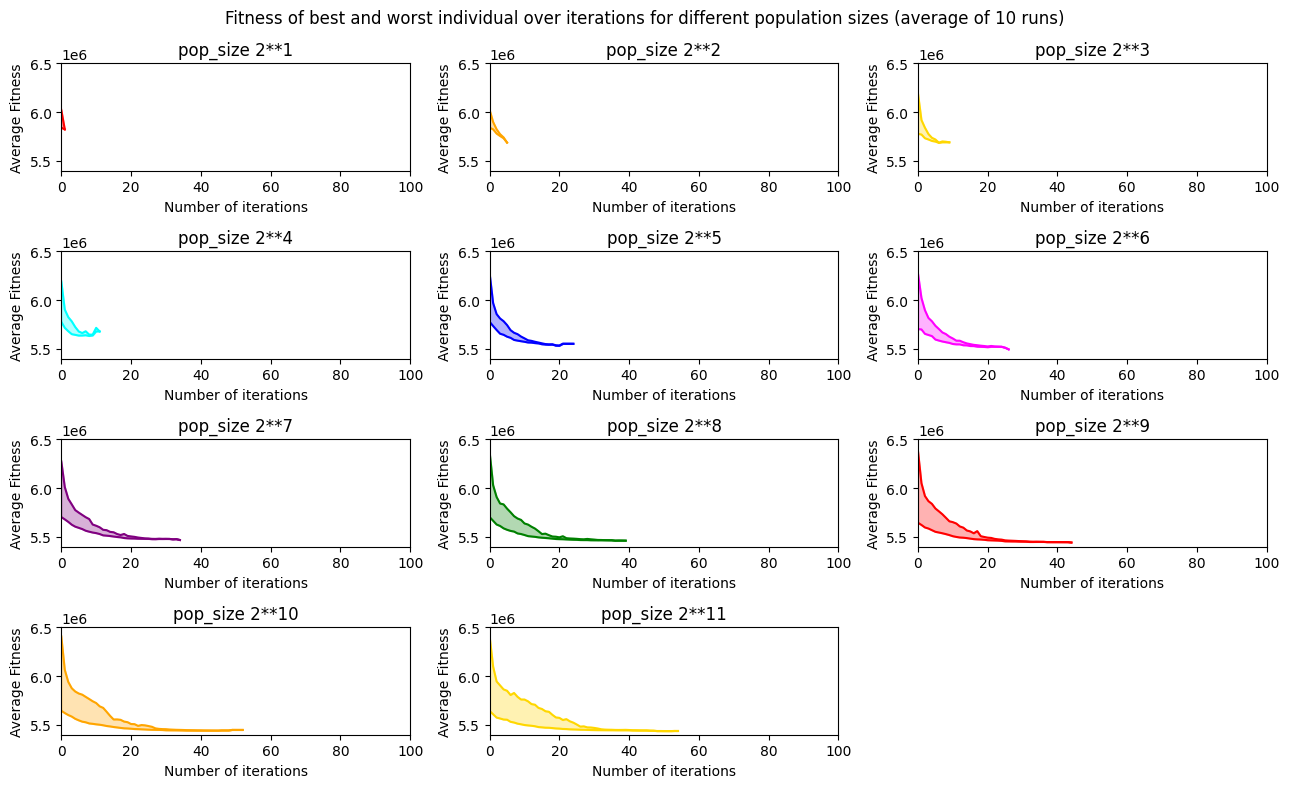

In [8]:
alltime_worst   = max([max(x) for x in all_worst_overtime])
alltime_best    = min([min(x) for x in all_best_overtime])

ylim_min = round_to_multiple(alltime_best,  100000, int)
ylim_max = round_to_multiple(alltime_worst, 100000, ceil)



fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, 8))


for i in range(ncols * nrows - len(all_best_overtime)):
    i += len(all_best_overtime)

    fig.delaxes(axes[i // ncols, i % ncols])

for i, (setup_name, best_overtime, worst_overtime) in enumerate(zip(setups.keys(), all_best_overtime, all_worst_overtime)):
    ax1      = axes[i // ncols, i % ncols]
    color   = colors[i % len(colors)]
    
    ax1.plot(best_overtime,  color=color)
    ax1.plot(worst_overtime, color=color)
    ax1.fill_between(np.arange(len(best_overtime)), best_overtime, worst_overtime, color=color, alpha=0.3)


    ax1.set_ylabel("Average Fitness")
    ax1.set_xlabel("Number of iterations")
    ax1.set_xlim(0, exp_cfg.max_gen)
    ax1.set_ylim(ylim_min, ylim_max)
    ax1.set_title(setup_name)

plt.suptitle(f"Fitness of best and worst individual over iterations for different population sizes (average of {exp_cfg.n_experiments} runs)")
fig.tight_layout()
plt.show()

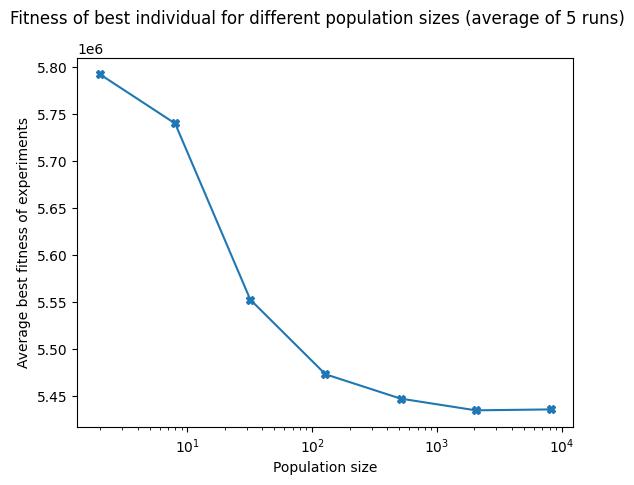

In [17]:
# Best fitness per pop_size (avg 5 runs)
best_per_setup  = [min(x) for x in all_best_overtime]



plt.plot(pop_sizes, best_per_setup, marker="X")
plt.xlabel("Population size")
plt.xscale("log")

plt.ylabel("Average best fitness of experiments")

plt.suptitle(f"Fitness of best individual for different population sizes (average of {exp_cfg.n_experiments} runs)")


plt.show()

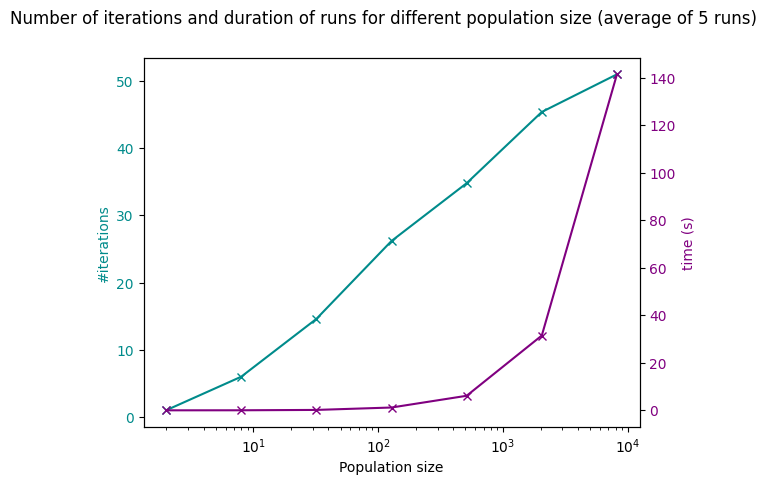

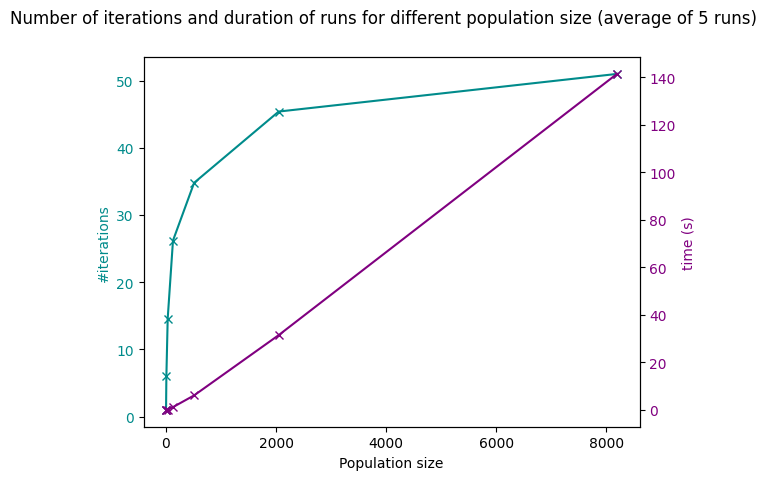

In [18]:
# #iterations and time for pop size (avg 5 runs)

color1, color2 = "darkcyan", "purple"


for scale in ["log", "linear"]:
    fig, ax1 = plt.subplots()
    plt.xscale(scale)
    plt.xlabel("Population size")

    ax1.plot(pop_sizes, all_iterations, color=color1, marker="x")
    ax1.set_ylabel("#iterations", color=color1)
    ax1.tick_params(axis="y", labelcolor=color1)




    ax2 = ax1.twinx()


    ax2.plot(pop_sizes, all_total_times, color=color2, marker="x")
    ax2.set_ylabel("time (s)", color=color2)
    ax2.tick_params(axis="y", labelcolor=color2)




    plt.suptitle(f"Number of iterations and duration of runs for different population size (average of {exp_cfg.n_experiments} runs)")
    plt.show()